# Creating a wordcloud from Facebook posts

Recently people on Facebook have been posting wordclouds of their posts using a FB app. I thought this was cool, but I didn't really want to give an unknown app access to all my Facebook data. I'm in the process of learning python, so I thought it would be a fun project to try to do this in python.

## Getting the data

You can download all your Facebook data under settings. This gives you a zip file with all your photos, videos and posts in html format. All the posts are in the 'wall.htm' file.

I used the [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/) package to parse the HTML file, and [Wordcloud](http://amueller.github.io/word_cloud/) to create the word cloud.

In [2]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

path = '/media/pat/storage/Documents/facebook_data/html/wall.htm'
soup = BeautifulSoup(open(path), "lxml")

For some reason, there are no posts from me before 2007...either facebook or I deleted them I guess. The post data is formatted with a meta class that contains the date and time posted, and a comment class that contains the post text. In between these tags is a block of text that indicates who posted. 

![html format](/media/pat/storage/Documents/facebook_data/html.png)

First, I extracted all comment data.

In [3]:
comments = soup.find_all('div', class_='comment')

Next, I wanted to separate my posts from everyone else's in separate lists.

In [4]:
all_dates = []
all_posts = []
my_dates = []
my_posts = []
other_dates = []
other_posts = []

# loop through comments to separate my posts from others
for element in comments:
    # The date is in the meta class which is 2 elements back from the comment class
    all_dates.append(element.previous_sibling.previous_sibling.get_text())
    # extract comment text and add to list
    all_posts.append(element.get_text())
    # check if my name is directly before the comment. If so, this is one of my posts
    if 'Patrick Boyle updated his status.' in element.previous_sibling:
        my_dates.append(element.previous_sibling.previous_sibling.get_text())
        my_posts.append(element.get_text())
    else:
        other_dates.append(element.previous_sibling.previous_sibling.get_text())
        other_posts.append(element.get_text())

In [5]:
# convert date strings into datetime objects
from datetime import datetime
all_dates = [datetime.strptime(date,'%A, %B %d, %Y at %I:%M%p %Z') for date in all_dates]
my_dates = [datetime.strptime(date,'%A, %B %d, %Y at %I:%M%p %Z') for date in my_dates]
other_dates = [datetime.strptime(date,'%A, %B %d, %Y at %I:%M%p %Z') for date in other_dates]

Next, I joined all the posts into one string object to input into the wordcloud.

In [6]:
all_text = ' '.join(all_posts)
my_text = ' '.join(my_posts)
other_text = ' '.join(other_posts)

print len(all_text.split())
print len(my_text.split())
print len(other_text.split())

16143
7338
8805


## Create wordclouds

First, I made a wordcloud of all the posts on my wall.

/home/pat/anaconda2/lib/python2.7/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


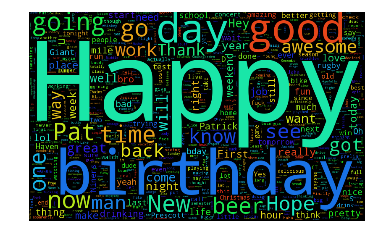

In [7]:
all_cloud = WordCloud(max_words=20000,
                      relative_scaling=0.5, 
                      stopwords=STOPWORDS, 
                      width=800, height=500).generate(all_text)

# Open a plot of the generated image.
plt.imshow(all_cloud)
plt.axis("off")
plt.show()

This is cool...a lot of happy birthday posts obviously, my name, beer, etc.

Next, I made a cloud of just my posts.

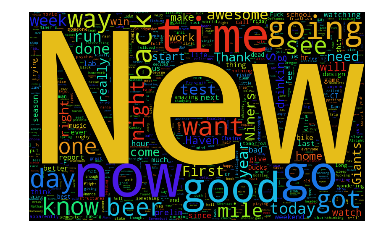

In [8]:
my_cloud = WordCloud(max_words=10000,
                     relative_scaling=0.5, 
                     stopwords=STOPWORDS, 
                     width=800, height=500).generate(my_text)

# Open a plot of the generated image.
plt.imshow(my_cloud)
plt.axis("off")
plt.show()

This is kinda strange...why is "New" so frequent? After digging around the text for a bit I found that I wrote "New Haven" a lot. I decided to replace "New Haven" with "NewHaven" to get around this.

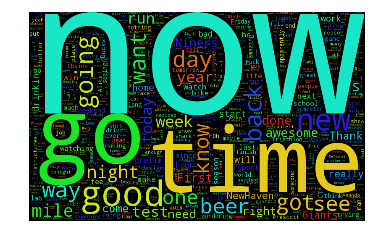

In [9]:
my_text2 = my_text.replace('New Haven', 'NewHaven')
my_cloud2 = WordCloud(max_words=10000,
                     relative_scaling=0.5, 
                     stopwords=STOPWORDS, 
                     width=800, height=500).generate(my_text2)

# Open a plot of the generated image.
plt.imshow(my_cloud2)
plt.axis("off")
plt.show()

Ok, so now this looks a little better. Ha, I used the word "now" in the previous sentence...I guess that makes sense.

Finally, I made a cloud of just other people's posts on my wall.

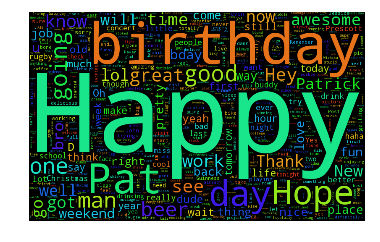

In [10]:
other_cloud = WordCloud(max_words=10000, 
                        relative_scaling=0.5, 
                        stopwords=STOPWORDS, 
                        width=800, height=500).generate(other_text)

# Open a plot of the generated image.
plt.imshow(other_cloud)
plt.axis("off")
plt.show()

Well, well, well...looks like the main reason people post on my wall is to wish me happy birthday. I'll combine "Happy Birthday" and "Happy birthday" into "HappyBirthday" to see what that does.

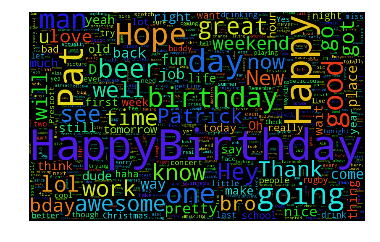

In [12]:
other_text2 = other_text.replace('Happy birthday', 'HappyBirthday')
other_text2 = other_text2.replace('Happy Birthday', 'HappyBirthday')
other_cloud2 = WordCloud(max_words=10000,
                         relative_scaling=0.5, 
                         stopwords=STOPWORDS, 
                         width=800, height=500).generate(other_text2)

# Open a plot of the generated image.
plt.imshow(other_cloud2)
plt.axis("off")
plt.show()

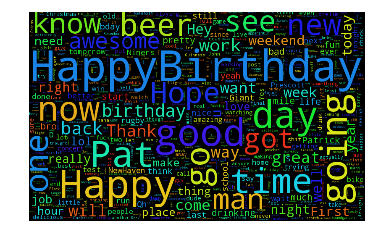

In [13]:
all_text2 = all_text.replace('Happy birthday', 'HappyBirthday')
all_text2 = all_text2.replace('Happy Birthday', 'HappyBirthday')
all_text2 = all_text2.replace('New Haven', 'NewHaven')
all_cloud2 = WordCloud(max_words=20000,
                         relative_scaling=0.5, 
                         stopwords=STOPWORDS, 
                         width=800, height=500).generate(all_text2)

# Open a plot of the generated image.
plt.imshow(all_cloud2)
plt.axis("off")
plt.show()

So that evens things out a bit.

I bet this would show up in the post dates as well.

In [11]:
# first create a dataframes of all posts, my posts, and other posts
import pandas as pd
df_all = pd.DataFrame(columns=['date', 'comment'])
df_all.date = all_dates
df_all.comment = all_posts

df_my = pd.DataFrame(columns=['date', 'comment'])
df_my.date = my_dates
df_my.comment = my_posts

df_other = pd.DataFrame(columns=['date', 'comment'])
df_other.date = other_dates
df_other.comment = other_posts

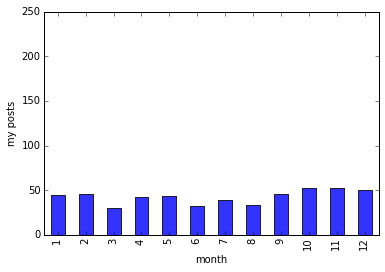

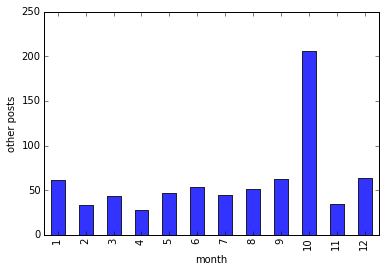

In [12]:
# now plot post frequency per month
df_my.date.groupby(df_my.date.dt.month).count().plot(kind='bar', alpha=0.8)
plt.ylim([0, 250])
plt.xlabel('month')
plt.ylabel('my posts')
plt.show()

df_other.date.groupby(df_other.date.dt.month).count().plot(kind='bar', alpha=0.8)
plt.ylim([0, 250])
plt.xlabel('month')
plt.ylabel('other posts')
plt.show()

Oh, will ya look at that...seems like October is a popular month ;-)

Now I want to see post frequency over time.

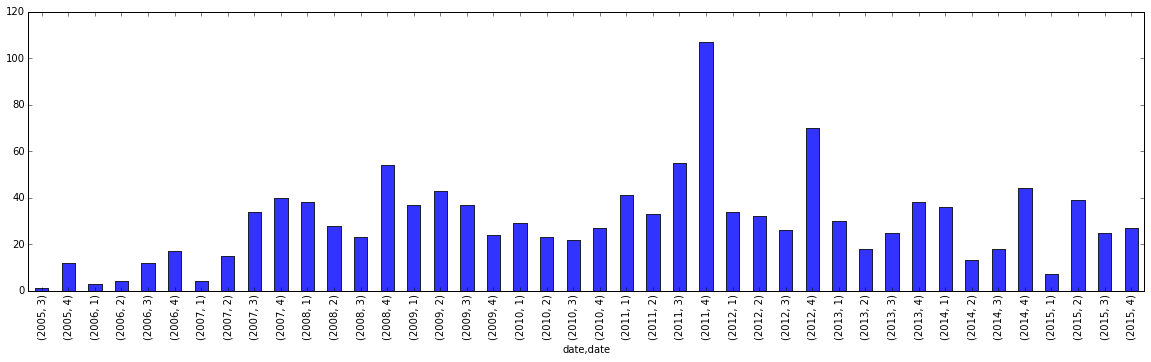

In [13]:
# plot posts per year, quarter
df_all.date.groupby([df_all.date.dt.year, df_all.date.dt.quarter]).count().plot(kind="bar", alpha=0.8, figsize=(20,5))
plt.show()

Seems I peaked in late 2011.

## Summary

This was a cool little project. There's other things I could do, like make a wordcloud for each year to see the change, but this is good for now. Hope you enjoyed it too!